In [11]:
import funclab as fl

import matplotlib.pyplot as plt
import numpy as np

# Example 1: Force as a function of intensity

In this example, we use experimental data from a study investigating the interaction force between two parallel conducting wires carrying a current. A precise torsion balance was used to measure the magnetic force between the wires, compensating for it with the gravitational force. Specifically, we analyze how the force varies with the intensity of the current.

The data is saved in a Google Sheets document located in the same folder as this document. The image below shows the content inside the Google Sheet document.


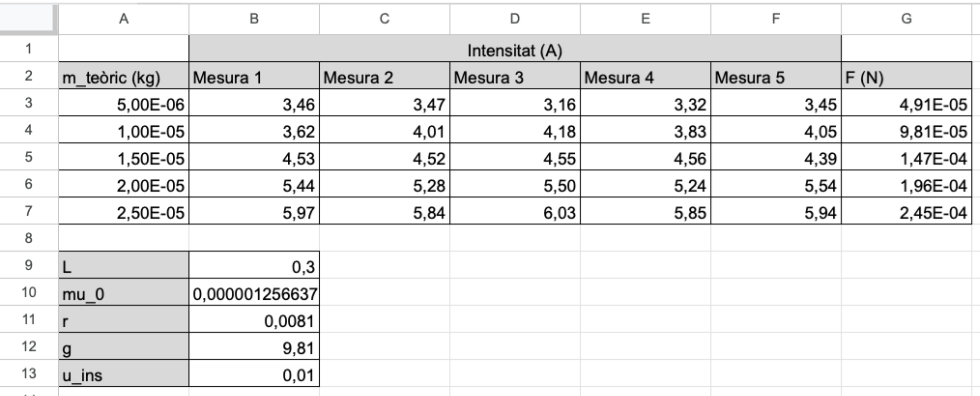

## Import the data


We import this data using the `import_data()` function. In the variable `I` we save the measures of intensity, where each row contains different measures of the same scenario.

In the `F_val` variable we save the force for each scenario.

Finally, in the `const` variable we save the values of the constants we will need.

In [12]:
I = fl.import_data('experimental_data', 'Data', 'B3:F7', orientation='rows')

F_val = fl.import_data('experimental_data', 'Data', 'G3:G7')

# Constants [L, mu_0, r, g, u_ins]
const = fl.import_data('experimental_data', 'Data', 'B9:B13')

## Make calculations

For each scenario, we calculate the mean and uncertainty of the measures using the `mean()` function.

In [13]:
I_mean = []
I_inc = []

for i in range(len(I)):
  I_mean_inc = fl.mean(I[i], const[4])
  I_mean.append(I_mean_inc[0])
  I_inc.append(I_mean_inc[1])



Mean: $3.37 \pm 0.06$
Mean: $3.94 \pm 0.10$
Mean: $4.51 \pm 0.03$
Mean: $5.40 \pm 0.06$
Mean: $5.93 \pm 0.04$


For each scenario, we calculate the mean and uncertainty of the measures using the `mean()` function. We create an instance of the `Variable` class for the intensity using the values of the means and its uncertainties.

The force will depend on the squared intensity so we create a new variable for it and use the `prop_uncertainty()` function to calculate the uncertainties.

We create another instance of the `Variable` class  `Variable` for the force (with no uncertainty).


In [14]:
I = fl.Variable('I', I_mean, I_inc)

I2_sim = I.sim*I.sim
I2_val, I2_inc = fl.prop_uncertainty(I2_sim, [I])
I2 = fl.Variable('I2', I2_val, I2_inc)

F = fl.Variable('F', F_val, 0)

Symbolic uncertainty expression:
2 \sqrt{I^{2} \sigma_{I}^{2}}


## Plot the data

From theory, we know that force will depend on the squared of the intensity as

\begin{equation}
F = \frac{\mu_0 I^2 L}{2 \pi r},
\end{equation}

so, being $x= I^2$, we define a function where $\mu_0$ will be a parameter.

In [15]:
def func(mu,x):
  return (mu*x*const[0])/(2*np.pi*const[2])

We plot the experimental data using `plot_data()` and the curve fit using `plot_fit()` (the fit will find the value of $\mu_0$ that makes the function best fit the experimental data).

This prints the value for $\mu_0$ found and its uncertainty.

Fitting results:
Parameter a_0 = 1.1472533007421601e-06 ± 4.922396466118074e-08
R² = 0.9597


(0.0, 0.0003)

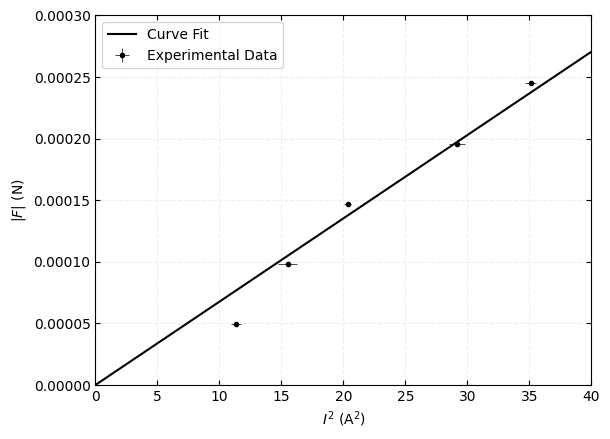

In [16]:
fig, ax = plt.subplots()
fl.plot_data(ax, I2, F, label = 'Experimental Data')
fl.plot_fit(ax, I2, F, func, x_range = [0, 40])

plt.xlabel('$I^2$ (A$^2$)')
plt.ylabel('$|F|$ (N)')
plt.xlim(0, 40)
plt.ylim(0., 0.0003)

## Make LaTeX table

Finally, we will use the `Table` class to print the data in LaTeX format.

To do it, we first import the data from the Google Sheets documents using the `import_from_range()` method.

In [17]:
table = fl.Table()

table.import_from_range('experimental_data', 'Data', 'A2:G7')
table.print_data()

['m_teòric (kg)', 'Mesura 1', 'Mesura 2 ', 'Mesura 3', 'Mesura 4', 'Mesura 5', 'F (N)']
['5,00E-06', '3,46', '3,47', '3,16', '3,32', '3,45', '4,91E-05']
['1,00E-05', '3,62', '4,01', '4,18', '3,83', '4,05', '9,81E-05']
['1,50E-05', '4,53', '4,52', '4,55', '4,56', '4,39', '1,47E-04']
['2,00E-05', '5,44', '5,28', '5,50', '5,24', '5,54', '1,96E-04']
['2,50E-05', '5,97', '5,84', '6,03', '5,85', '5,94', '2,45E-04']


We add a column with the calculated means and their uncertainties.

In [18]:
means =['mean']

for i in I_mean: means.append(str(round(i,4)))
table.add_column(means, index=6)

unc =['']

for i in I_inc: unc.append(str(round(i, 4)))
table.add_uncertainties(unc, axis='column', index =6)

table.change_value(0,6, 'mean')
table.print_data()

['m_teòric (kg)', 'Mesura 1', 'Mesura 2 ', 'Mesura 3', 'Mesura 4', 'Mesura 5', 'mean', 'F (N)']
['5,00E-06', '3,46', '3,47', '3,16', '3,32', '3,45', '3.372 $\\pm$ 0.0604', '4,91E-05']
['1,00E-05', '3,62', '4,01', '4,18', '3,83', '4,05', '3.938 $\\pm$ 0.0977', '9,81E-05']
['1,50E-05', '4,53', '4,52', '4,55', '4,56', '4,39', '4.51 $\\pm$ 0.0324', '1,47E-04']
['2,00E-05', '5,44', '5,28', '5,50', '5,24', '5,54', '5.4 $\\pm$ 0.0605', '1,96E-04']
['2,50E-05', '5,97', '5,84', '6,03', '5,85', '5,94', '5.926 $\\pm$ 0.0375', '2,45E-04']


Finally, we print the table in LaTex format using the `latex_table()` method.

In [19]:
table.latex_table(hlines='0100000', vlines='010000110')

\begin{table}[h!]
    \centering
    \caption{}
    \label{tab:}
    \begin{tabular}{c|ccccc|c|c}
        m_teòric (kg) & Mesura 1 & Mesura 2  & Mesura 3 & Mesura 4 & Mesura 5 & mean & F (N) \\ \hline
        5,00E-06 & 3,46 & 3,47 & 3,16 & 3,32 & 3,45 & 3.372 $\pm$ 0.0604 & 4,91E-05 \\
        1,00E-05 & 3,62 & 4,01 & 4,18 & 3,83 & 4,05 & 3.938 $\pm$ 0.0977 & 9,81E-05 \\
        1,50E-05 & 4,53 & 4,52 & 4,55 & 4,56 & 4,39 & 4.51 $\pm$ 0.0324 & 1,47E-04 \\
        2,00E-05 & 5,44 & 5,28 & 5,50 & 5,24 & 5,54 & 5.4 $\pm$ 0.0605 & 1,96E-04 \\
        2,50E-05 & 5,97 & 5,84 & 6,03 & 5,85 & 5,94 & 5.926 $\pm$ 0.0375 & 2,45E-04 \\
    \end{tabular}
\end{table}
